In [1]:
from constants import TRAIN_AUTOENCODER_FLUXES_PATH, \
                      TRAIN_AUTOENCODER_AMP_PHASE_PATH, \
                      VALIDATION_AUTOENCODER_FLUXES_PATH, \
                      VALIDATION_AUTOENCODER_AMP_PHASE_PATH


from plot_utils import plot_map, \
                       plot_model_history, \
                       plot_autoencoder, \
                       plot_enc_conv_amp_phase_prediction


from data_utils import load_numpy_data


from modeling_utils import create_autoencoder_for_flux, \
                           create_convolutional_architecture_with_encoder_for_amplitude_phase_reconstruction, \
                           compile_model, \
                           train_model_with_generator, \
                           store_model

from configurations import AutoEncoderConfiguration, \
                           EncoderConvolutionalConfiguration

2023-12-19 10:29:54.174353: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 10:29:54.200397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 10:29:54.200415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 10:29:54.201084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 10:29:54.205638: I tensorflow/core/platform/cpu_feature_guar

In [22]:
validation_fluxes_array = load_numpy_data(VALIDATION_AUTOENCODER_FLUXES_PATH)
validation_amp_phase_array = load_numpy_data(VALIDATION_AUTOENCODER_AMP_PHASE_PATH)

In [3]:
validation_amp_phase_array.shape

(10000, 112, 96, 2)

In [4]:
validation_fluxes_array.shape

(10000, 56, 24)

In [5]:
model_configuration = AutoEncoderConfiguration()
print(model_configuration.get_description())


	=== FluxAutoencoder ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Autoencoder
		-Input shape: (56, 24, 1)
		-Convolutional Layers: [512, 256, 64, 32] (Inverse in the decoder)
		-Convolutonal Kernels: [(3, 3), (3, 3), (3, 3), (3, 3)] (Inverse in the decoder)
		-Convolutional Activation: relu
		-Output Layer Activation: linear
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.0001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 5
		-Batch size: 128
		-Callbacks:
			-ReduceLROnPlateau: MSE 8 x0.1
			-Early Stop: MSE 15
	


2023-12-19 10:29:56.723764: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 10:29:56.808047: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 10:29:56.808343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
model = create_autoencoder_for_flux(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "FluxAutoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 24, 512)       5120      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 24, 512)       2359808   
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 12, 512)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 12, 256)       1179904   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 12, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 6, 256)        0         
 g2D)                                              

In [7]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

In [8]:
history = train_model_with_generator(
    model,
    TRAIN_AUTOENCODER_FLUXES_PATH, 
    TRAIN_AUTOENCODER_FLUXES_PATH,
    validation_fluxes_array,
    validation_fluxes_array,
    *model_configuration.unpack_training_hyperparameters()
)

Epoch 1/5


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/modeling_utils.py:533: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,
2023-12-19 10:29:58.161806: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-19 10:29:58.275992: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 10:30:00.995863: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 10:30:02.859338: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2496c83d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-19 10:30:02.859360: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0):

547/547 [==============================] - 215s 346ms/step - loss: 0.3291 - mean_squared_error: 0.3291 - val_loss: 0.3216 - val_mean_squared_error: 0.3216 - lr: 1.0000e-04
Epoch 2/5
547/547 [==============================] - 195s 357ms/step - loss: 0.2687 - mean_squared_error: 0.2687 - val_loss: 0.3165 - val_mean_squared_error: 0.3165 - lr: 1.0000e-04
Epoch 3/5
547/547 [==============================] - 198s 361ms/step - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.3095 - val_mean_squared_error: 0.3095 - lr: 1.0000e-04
Epoch 4/5
547/547 [==============================] - 187s 341ms/step - loss: 0.2684 - mean_squared_error: 0.2684 - val_loss: 0.3035 - val_mean_squared_error: 0.3035 - lr: 1.0000e-04
Epoch 5/5
547/547 [==============================] - 185s 338ms/step - loss: 0.2685 - mean_squared_error: 0.2685 - val_loss: 0.3048 - val_mean_squared_error: 0.3048 - lr: 1.0000e-04


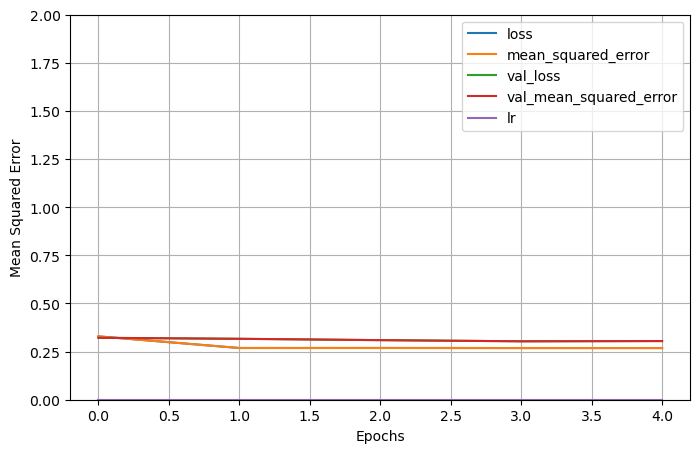

In [9]:
plot_model_history(history)

In [10]:
plot_autoencoder(model, validation_fluxes_array[757])

1/1 [==============================] - 0s 342ms/step


1/1 [==============================] - 0s 13ms/step


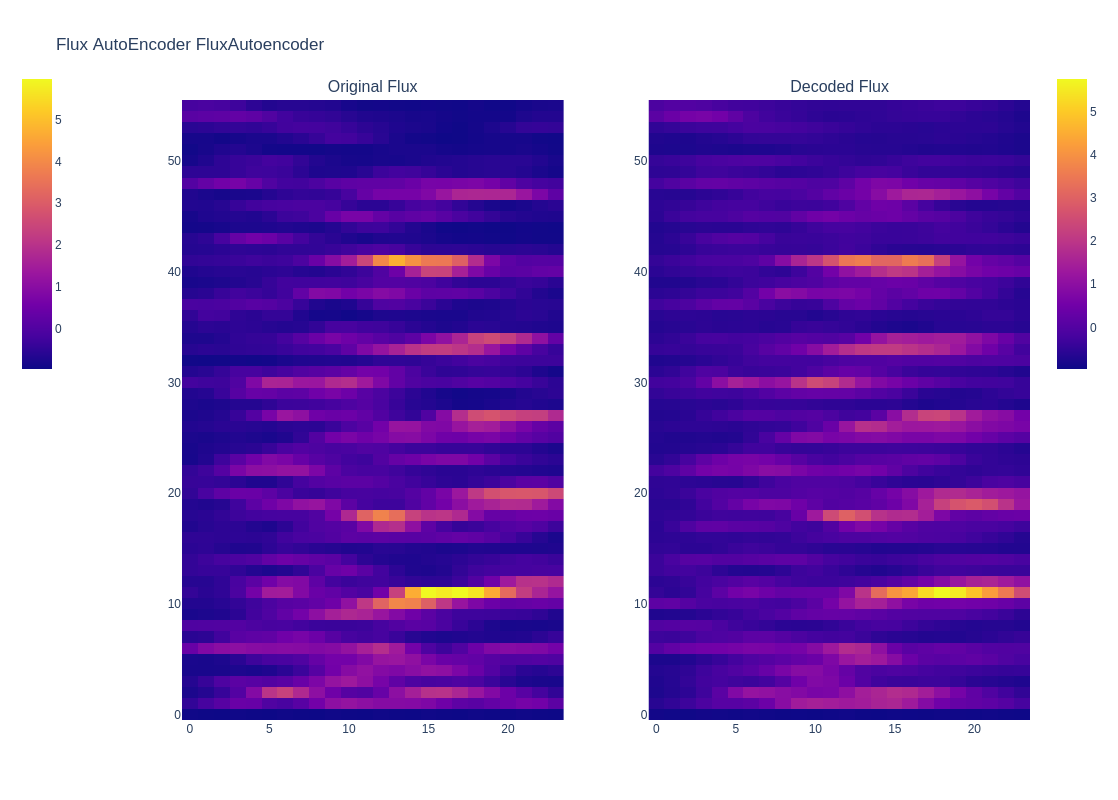

In [11]:
plot_autoencoder(model, validation_fluxes_array[758])

In [12]:
store_model(model,
            model.name,
            model_configuration.get_description())

In [13]:
model_configuration = EncoderConvolutionalConfiguration()

In [14]:
enc_conv_model = create_convolutional_architecture_with_encoder_for_amplitude_phase_reconstruction(
    model,
    *model_configuration.unpack_architecture_hyperparameters())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 56, 24, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 24, 512)       5120      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 24, 512)       2359808   
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 12, 512)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 12, 256)       1179904   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 12, 256)       590080    
                                                             

In [15]:
compile_model(
    enc_conv_model,
    *model_configuration.unpack_compilation_hyperparameters()
)

In [16]:
validation_amp_phase_array.shape

(10000, 112, 96, 2)

In [17]:
history = train_model_with_generator(
    enc_conv_model,
    TRAIN_AUTOENCODER_FLUXES_PATH,
    TRAIN_AUTOENCODER_AMP_PHASE_PATH,
    validation_fluxes_array,
    validation_amp_phase_array,
    *model_configuration.unpack_training_hyperparameters()
)

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/modeling_utils.py:533: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/20
2188/2188 [==============================] - 381s 167ms/step - loss: 0.6000 - mean_squared_error: 0.6000 - val_loss: 0.5953 - val_mean_squared_error: 0.5953 - lr: 1.0000e-04
Epoch 2/20
2188/2188 [==============================] - 358s 164ms/step - loss: 0.5976 - mean_squared_error: 0.5976 - val_loss: 0.5952 - val_mean_squared_error: 0.5952 - lr: 1.0000e-04
Epoch 3/20
2188/2188 [==============================] - 356s 163ms/step - loss: 0.5974 - mean_squared_error: 0.5974 - val_loss: 0.5963 - val_mean_squared_error: 0.5963 - lr: 1.0000e-04
Epoch 4/20
2188/2188 [==============================] - 355s 162ms/step - loss: 0.5973 - mean_squared_error: 0.5973 - val_loss: 0.5951 - val_mean_squared_error: 0.5951 - lr: 1.0000e-04
Epoch 5/20
2188/2188 [==============================] - 355s 162ms/step - loss: 0.5970 - mean_squared_error: 0.5970 - val_loss: 0.5955 - val_mean_squared_error: 0.5955 - lr: 1.0000e-04
Epoch 6/20
2188/2188 [==============================] - 355s 162ms/step - l

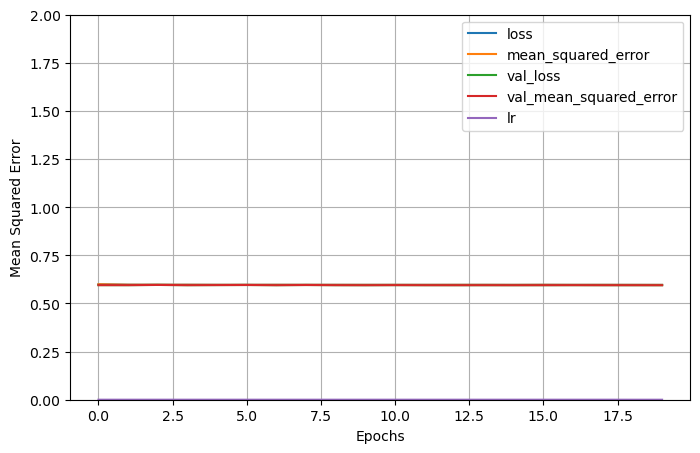

In [18]:
plot_model_history(history)

In [24]:
plot_enc_conv_amp_phase_prediction(enc_conv_model,
                                   validation_fluxes_array[0], 
                                   validation_amp_phase_array[0][0],
                                   validation_amp_phase_array[0][1])

1/1 [==============================] - 0s 338ms/step
